# Name: Nisrin Dhoondia  

# Computer Vision Bootcamp: Final Project

In [ ]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# loading the dataset cifar10
from tensorflow.keras.datasets.cifar10 import load_data
(Xtrain, ytrain) , (Xtest, ytest) = load_data()  

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
# getting the shape of train and test dataset
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
# getting the shape of the first image
Xtrain[0].shape

(32, 32, 3)

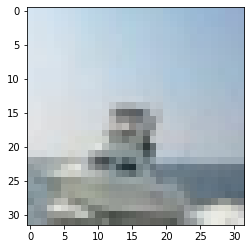

In [ ]:
# viewing the image on index position 100
plt.imshow(Xtrain[100]);

In [ ]:
# normalizing the Xtrain and Xtest values to be between 0 and 1
Xtrain = Xtrain / 255.0
Xtest = Xtest / 255.0

In [ ]:
# building a deep learning neural network model
inputshape = Xtrain[0].shape
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = inputshape))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation ='relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [ ]:
# making the model ready
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

# training the model
history = model.fit(Xtrain, ytrain, epochs = 10, validation_data = (Xtest, ytest))

Epoch 1/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.7230 - accuracy: 0.3686 - val_loss: 1.2305 - val_accuracy: 0.5602
Epoch 2/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1808 - accuracy: 0.5840 - val_loss: 1.0674 - val_accuracy: 0.6250
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0037 - accuracy: 0.6489 - val_loss: 0.9434 - val_accuracy: 0.6740
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8995 - accuracy: 0.6844 - val_loss: 0.9286 - val_accuracy: 0.6829
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8246 - accuracy: 0.7084 - val_loss: 0.8980 - val_accuracy: 0.6893
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7439 - accuracy: 0.7391 - val_loss: 0.9845 - val_accuracy: 0.6698
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7056 - accuracy: 0.7524 - val_loss: 0.8685 -

In [ ]:
# evaluating the performance of the model
test_loss, test_acc = model.evaluate(Xtest, ytest, verbose = 2)

313/313 - 3s - loss: 0.9056 - accuracy: 0.7078


In [ ]:
# loss
test_loss

0.9055692553520203

In [ ]:
# accuracy
test_acc

0.7077999711036682